In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, auc, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
churn_data  =pd.read_csv("EDA_final.csv")
churn_data.drop(["Unnamed: 0"],axis=1,inplace=True)
churn_data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,Churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4965,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4966,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4967,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


### Modeling

### 1. Logistic Regression

In [3]:
X=churn_data.drop(["Churn"],axis=1)
y =churn_data[["Churn"]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [5]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [6]:
y_pred = model_logistic.predict(X_test)

In [7]:
acc1 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc1)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       853
           1       0.43      0.09      0.14       141

    accuracy                           0.85       994
   macro avg       0.65      0.53      0.53       994
weighted avg       0.80      0.85      0.81       994

Accuracy = 0.8541247484909457


<h2><center> 2.SUPPORT VECTOR CLASSIFIER</center></h2>

In [8]:
clf = SVC()

kernel: 'poly'
parameters ={'kernel':['rbf'],
              'gamma':[100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
               'C':[50, 15, 10, 6, 5, 0.1, 0.001, 0.0001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv=10)

gsv.fit(X_train,y_train)

KeyboardInterrupt: 

In [22]:
gsv.best_params_

{'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}

In [23]:
gsv.best_score_

0.9023897826664811

In [9]:
svc_model = SVC(C = 5, gamma =0.0001, kernel='rbf')
svc_model.fit(X_train , y_train)

SVC(C=5, gamma=0.0001)

In [10]:
y_pred_svc = svc_model.predict(X_test)

In [11]:
acc2 = accuracy_score(y_test,y_pred_svc)
print('Classification Report : \n',classification_report(y_test,y_pred_svc))
print('='*50)
print('Accuracy =',acc2)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       853
           1       0.86      0.40      0.55       141

    accuracy                           0.91       994
   macro avg       0.89      0.70      0.75       994
weighted avg       0.90      0.91      0.89       994

Accuracy = 0.9064386317907445


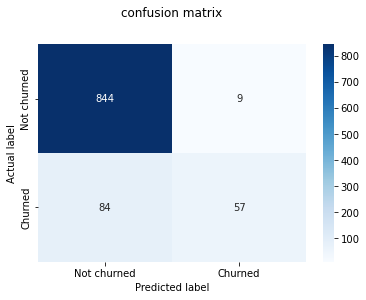

In [13]:
cm = confusion_matrix(y_test,y_pred_svc)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [14]:
svc_model.score(X_train,y_train)

0.9149685534591195

In [15]:
svc_model.score(X_test,y_test)

0.9064386317907445

<h2><center>3. Decision Tree</center></h2>

In [16]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=124)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=124),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [35]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=124)

In [17]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9, max_features='auto', random_state=124)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=124)

In [18]:
#Predicting on test data
y_pred_dt = dt_model.predict(X_test) # predicting on test data set 

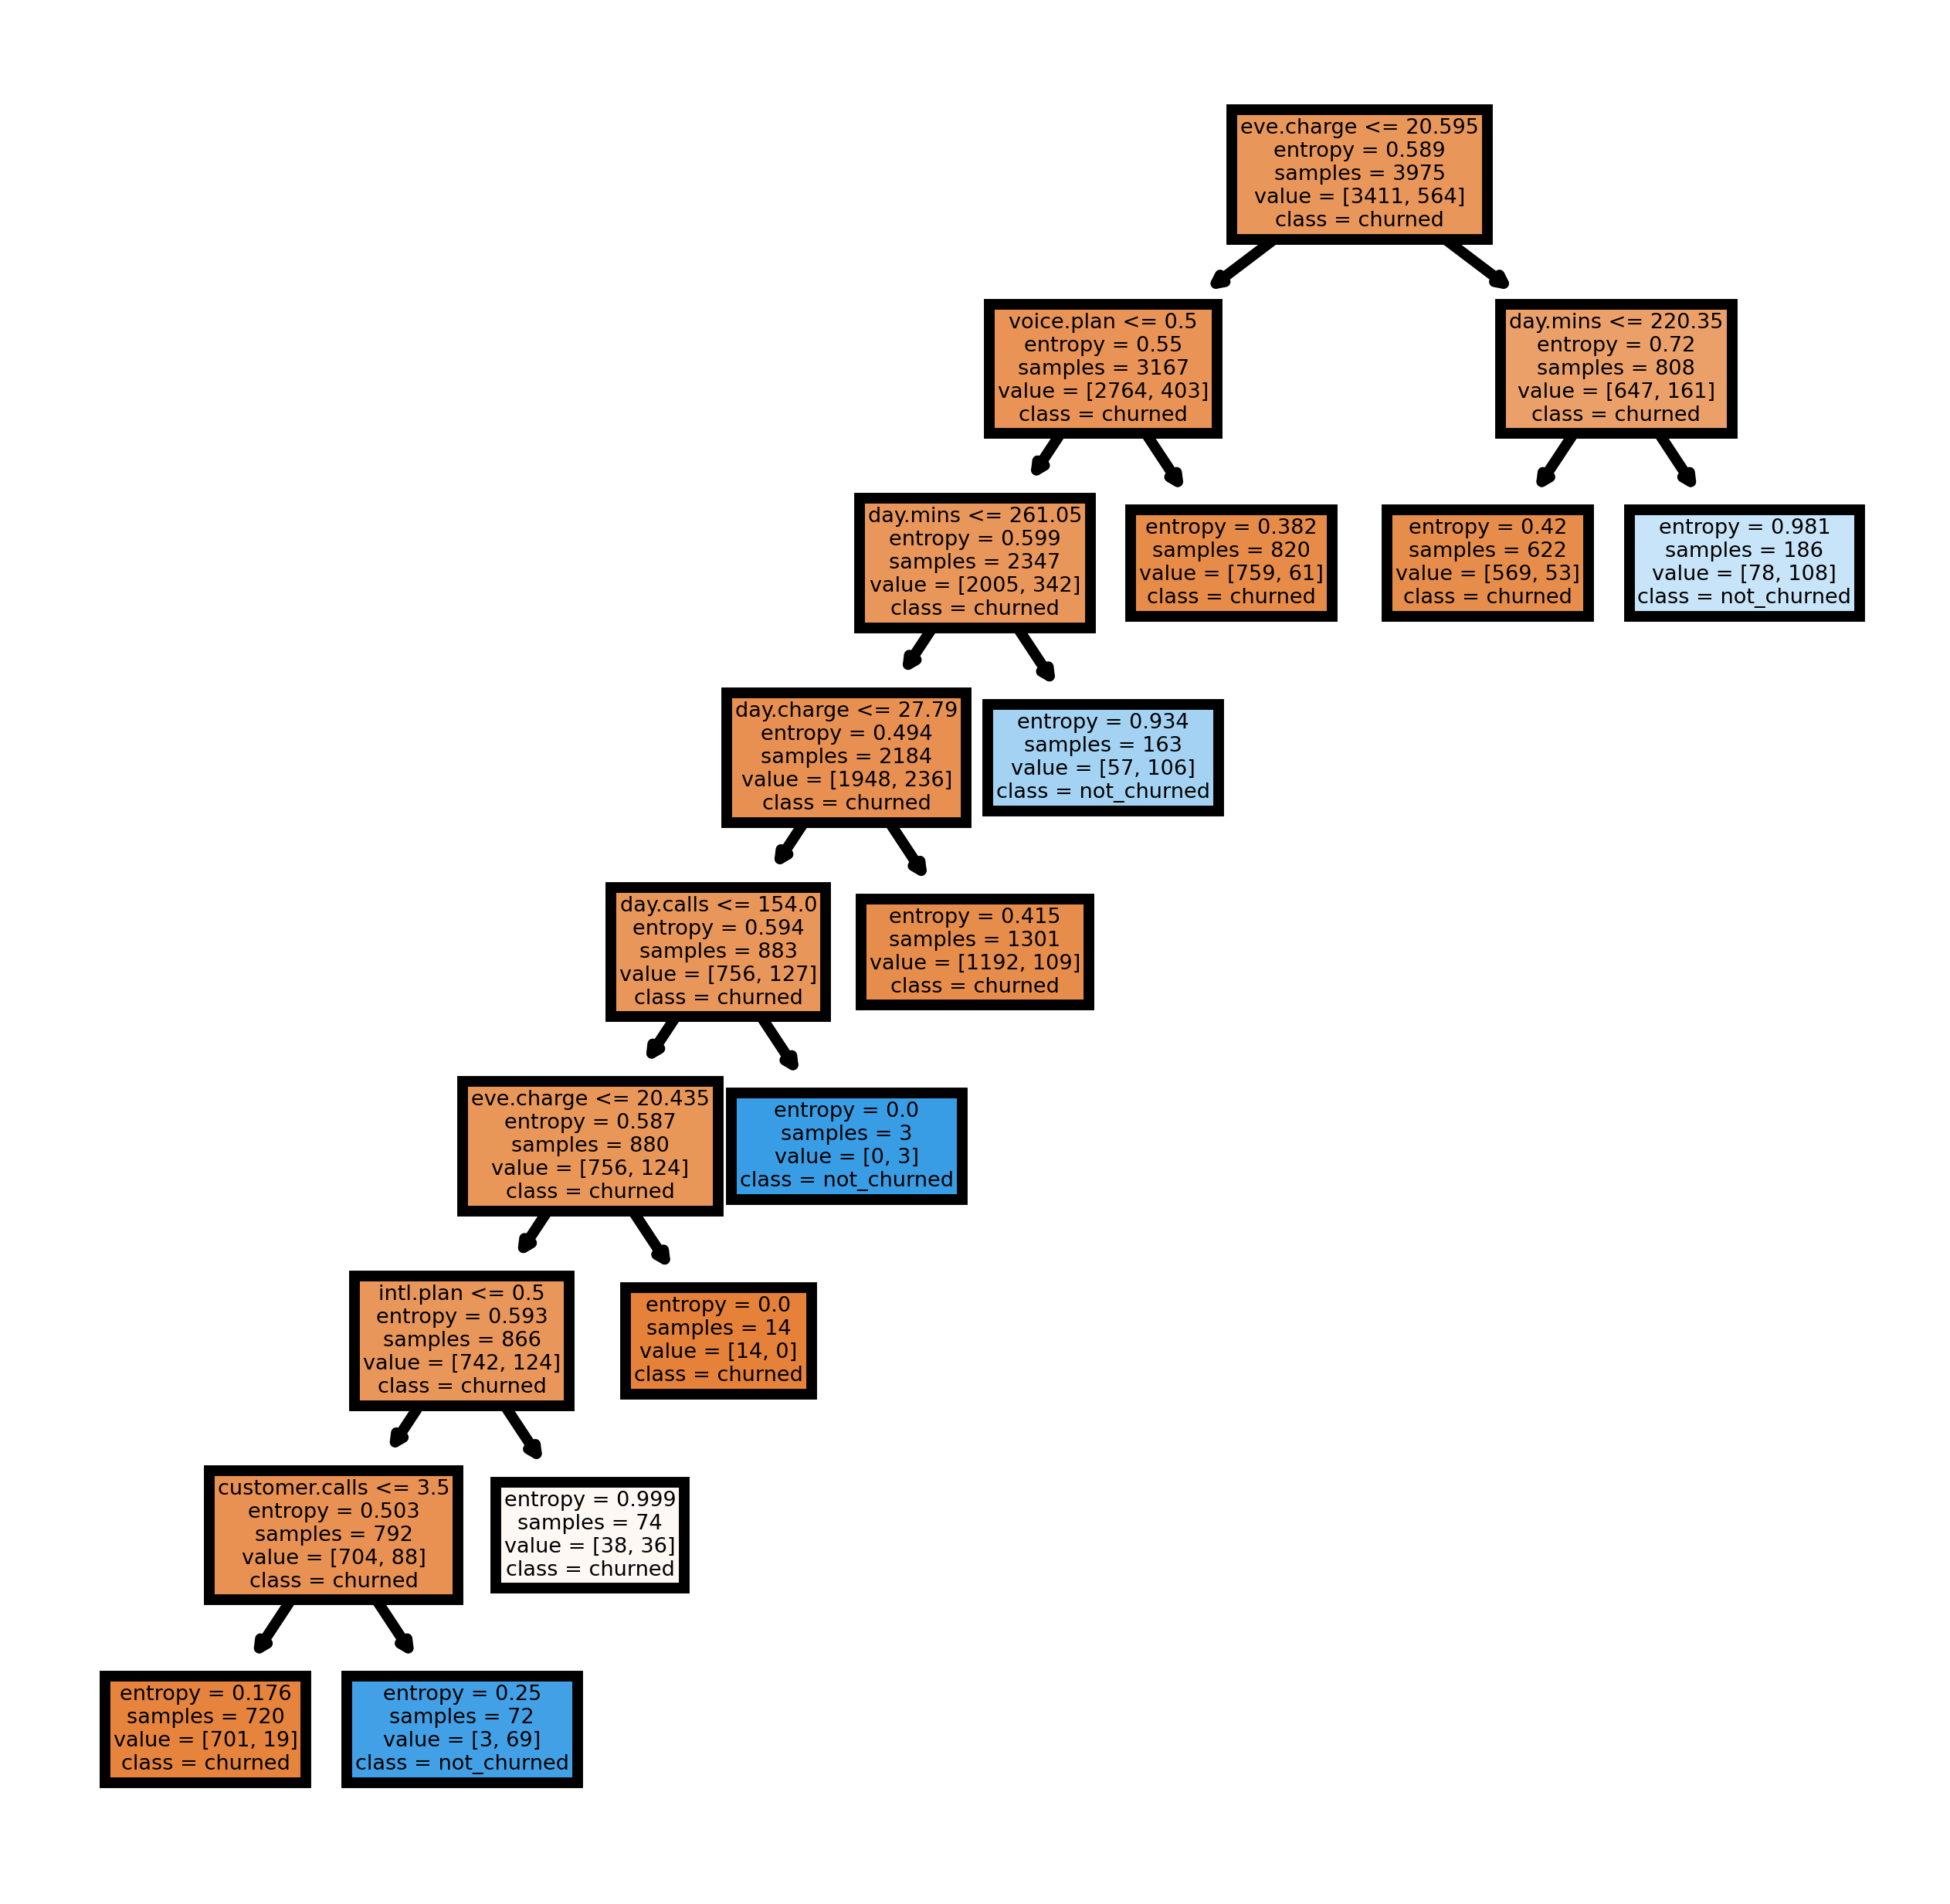

In [40]:
fn=['state','area.code','account.length','voice.plan','voice.messages','intl.plan','intl.mins','intl.calls','intl.charge','day.mins','day.calls','day.charge','eve.mins','eve.calls','eve.charge','night.mins','night.calls','night.charge','customer.calls']
cn=['churned','not_churned']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)
plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [19]:
acc3 = accuracy_score(y_test,y_pred_dt)
print('Classification Report : \n',classification_report(y_test,y_pred_dt))
print('='*50)
print('Accuracy =',acc3)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       853
           1       0.76      0.54      0.63       141

    accuracy                           0.91       994
   macro avg       0.84      0.76      0.79       994
weighted avg       0.90      0.91      0.90       994

Accuracy = 0.9104627766599598


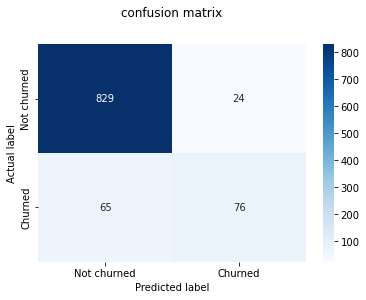

In [20]:
cm = confusion_matrix(y_test,y_pred_dt)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [21]:
dt_model.score(X_train,y_train)

0.9494339622641509

In [22]:
dt_model.score(X_test,y_test)

0.9104627766599598

<h2><center> 4.RANDOM FOREST </center></h2>

In [23]:
rfc=RandomForestClassifier(random_state=42)

In [46]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [47]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [48]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [24]:
rfc_model = RandomForestClassifier(n_estimators = 500,max_features="auto" ,max_depth=8 ,criterion = "entropy")
rfc_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=500)

In [25]:
y_pred_rfc = rfc_model.predict(X_test)

In [26]:
acc4 = accuracy_score(y_test,y_pred_rfc)
print("Classification report : \n",classification_report(y_test,y_pred_rfc))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       853
           1       0.92      0.66      0.77       141

    accuracy                           0.94       994
   macro avg       0.93      0.83      0.87       994
weighted avg       0.94      0.94      0.94       994

Accuracy Score 0.9436619718309859


Text(0.5, 14.09375, 'Predicted label')

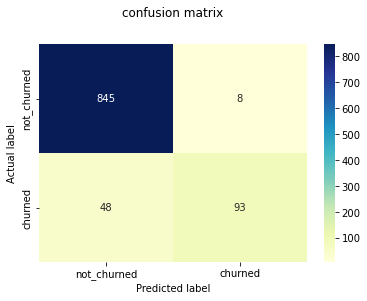

In [27]:
cm = confusion_matrix(y_test,y_pred_rfc)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [28]:
rfc_model.score(X_train,y_train)

0.9755974842767295

In [29]:
rfc_model.score(X_test,y_test)

0.9436619718309859

<h2><center> 5.K-NEAREST NEIGHBOUR </center></h2>

In [30]:
KNN=KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [31]:
# defining parameter range
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [32]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [33]:
grid_search.best_params_

{'n_neighbors': 6}

In [34]:
KNN_model = KNeighborsClassifier(n_neighbors=6)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [35]:
y_pred_knn = KNN_model.predict(X_test)

In [36]:
acc5 = accuracy_score(y_test,y_pred_knn)
print("Classification report : \n",classification_report(y_test,y_pred_knn))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       853
           1       0.80      0.30      0.44       141

    accuracy                           0.89       994
   macro avg       0.85      0.65      0.69       994
weighted avg       0.88      0.89      0.87       994

Accuracy Score 0.9436619718309859


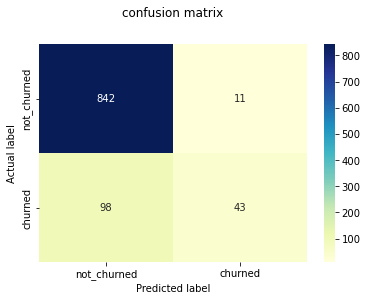

In [37]:
cm = confusion_matrix(y_test,y_pred_knn)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [38]:
KNN_model.score(X_train,y_train)

0.8958490566037736

In [39]:
KNN_model.score(X_test,y_test)

0.8903420523138833

<h2><center> 6.ANN MODEL </center></h2>

In [40]:
# Define the model architecture
ANN_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ANN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



# Evaluate the model on the test set
loss, acc6 = ANN_model.evaluate(X_test, y_test)

Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 2.6705 - accuracy: 0.7547 - val_loss: 0.7336 - val_accuracy: 0.8239
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.8008 - val_loss: 0.5496 - val_accuracy: 0.8592
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.8325 - val_loss: 0.4345 - val_accuracy: 0.8491
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8420 - val_loss: 0.5086 - val_accuracy: 0.8602
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8450 - val_loss: 0.4844 - val_accuracy: 0.8592
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8528 - val_loss: 0.4025 - val_accuracy: 0.8370
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8473 - val_loss: 0.5122 - val_accuracy: 0.8592

Epoch 58/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8725 - val_loss: 0.3345 - val_accuracy: 0.8682
Epoch 59/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8820 - val_loss: 0.3359 - val_accuracy: 0.8732
Epoch 60/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8813 - val_loss: 0.3286 - val_accuracy: 0.8742
Epoch 61/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8704 - val_loss: 0.3924 - val_accuracy: 0.8722
Epoch 62/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8772 - val_loss: 0.3753 - val_accuracy: 0.8541
Epoch 63/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8787 - val_loss: 0.3673 - val_accuracy: 0.8491
Epoch 64/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8782 - val_loss: 0.3176 - val_accuracy:

In [41]:
print("Test Accuracy",acc6)

Test Accuracy 0.8661971688270569


## ENSEMBLE TECHNIQUE

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_model = LogisticRegression(random_state=42)
rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [43]:
from sklearn.metrics import f1_score
rf_pred = rf_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)
print("Logistic Regression Accuracy:", logreg_acc)
print("Logistic Regression F1 Score:", logreg_f1)

Random Forest Accuracy: 0.9517102615694165
Random Forest F1 Score: 0.811023622047244
Logistic Regression Accuracy: 0.8541247484909457
Logistic Regression F1 Score: 0.14201183431952663


In [44]:
ensemble_pred = np.round((rf_pred + logreg_pred)/2)
ensemble_acc = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)

print("Ensemble Accuracy:", ensemble_acc)
print("Ensemble F1 Score:", ensemble_f1)

Ensemble Accuracy: 0.864185110663984
Ensemble F1 Score: 0.12903225806451615


<h2><center> 1. ADA BOOST </center></h2>

In [45]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [46]:
seed = 10
num_trees = 30

In [47]:
kfold = KFold(n_splits=5)
ada_model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(ada_model,X,y,cv=kfold)
print(results.mean())

0.8786475144927977


<h2><center> 2. XG BOOST </center></h2>

In [48]:
from sklearn import svm
from xgboost import XGBClassifier

In [49]:
clf = XGBClassifier()

In [50]:
kfold = KFold(n_splits=5)
xg_model = XGBClassifier(n_estimators = num_trees)
results = cross_val_score(xg_model,X,y,cv=kfold)
print(results.mean())

0.9565317382644304


<h2><center> 3. Stacking </center></h2>

In [51]:
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [52]:
clf1=KNeighborsClassifier(n_neighbors=1)
clf2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()
lr=LogisticRegression()
sclf=StackingClassifier(classifiers=[clf1,clf2,clf3],use_probas=True,meta_classifier=lr)

In [53]:
print('3-fold cross validation:\n')

for clf,label in zip([clf1,clf2,clf3,sclf],['KNN','Random_forest','Naive_bayes','StackingClassifier']):
    scores=cross_val_score(clf,X,y,cv=3,scoring='f1_macro')
    print("f1 Scores:",(scores.mean(),label))

3-fold cross validation:

f1 Scores: (0.6175481351892839, 'KNN')
f1 Scores: (0.900356710479922, 'Random_forest')
f1 Scores: (0.728272040956, 'Naive_bayes')
f1 Scores: (0.6175481351892839, 'StackingClassifier')


In [54]:
print('3-fold cross validation:\n')

for clf,label in zip([clf1,clf2,clf3,sclf],['KNN','Random_forest','Naive_bayes','StackingClassifier']):
    scores=cross_val_score(clf,X,y,cv=3,scoring='f1_macro')
    print("f1 Scores:%0.2f (+/- %0.2f)[%s]"%(scores.mean(),scores.std(),label))

3-fold cross validation:

f1 Scores:0.62 (+/- 0.02)[KNN]
f1 Scores:0.90 (+/- 0.01)[Random_forest]
f1 Scores:0.73 (+/- 0.00)[Naive_bayes]
f1 Scores:0.62 (+/- 0.02)[StackingClassifier]


<h2><center> 4. BAGGING </center></h2>

In [55]:
from sklearn.ensemble import BaggingClassifier

In [56]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,max_features=5,random_state=42)

In [57]:
bagging_clf.fit(X_train,y_train).score(X_test,y_test)

0.864185110663984

### Finding the best model

In [58]:
data = {"MODEL":pd.Series(["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","KNN","ANN","Ensemble"]),"Accuracy":pd.Series([acc1,acc2,acc3,acc4,acc5,acc6,ensemble_acc])}
Accuracy_table=pd.DataFrame(data)
Accuracy_table.sort_values(by='Accuracy')

,MODEL,Accuracy
0,Logistic Regression,0.854125
6,Ensemble,0.864185
5,ANN,0.866197
4,KNN,0.890342
1,Support Vector Machine,0.906439
2,Decision Tree,0.910463
3,Random Forest,0.943662
